In [1]:
import pandas as pd


In [2]:
data = 'covid_19_indonesia_time_series_all.csv'
df = pd.read_csv(data)

In [3]:
print(df.head())

       Date Location ISO Code     Location  New Cases  New Deaths  \
0  3/1/2020             ID-JK  DKI Jakarta          2           0   
1  3/2/2020             ID-JK  DKI Jakarta          2           0   
2  3/2/2020               IDN    Indonesia          2           0   
3  3/2/2020             ID-RI         Riau          1           0   
4  3/3/2020             ID-JK  DKI Jakarta          2           0   

   New Recovered  New Active Cases  Total Cases  Total Deaths  \
0              0                 2           39            20   
1              0                 2           41            20   
2              0                 2            2             0   
3              0                 1            1             0   
4              0                 2           43            20   

   Total Recovered  ...  Latitude New Cases per Million  \
0               75  ... -6.204699                  0.18   
1               75  ... -6.204699                  0.18   
2                

In [4]:
df_filtered = df[df['Location'] != 'Indonesia']

In [5]:
df_filtered.to_csv('filtered_covid_19_indonesia_time_series_all.csv', index=False)

In [6]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30893 entries, 0 to 31820
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         30893 non-null  object 
 1   Location ISO Code            30893 non-null  object 
 2   Location                     30893 non-null  object 
 3   New Cases                    30893 non-null  int64  
 4   New Deaths                   30893 non-null  int64  
 5   New Recovered                30893 non-null  int64  
 6   New Active Cases             30893 non-null  int64  
 7   Total Cases                  30893 non-null  int64  
 8   Total Deaths                 30893 non-null  int64  
 9   Total Recovered              30893 non-null  int64  
 10  Total Active Cases           30893 non-null  int64  
 11  Location Level               30893 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province             

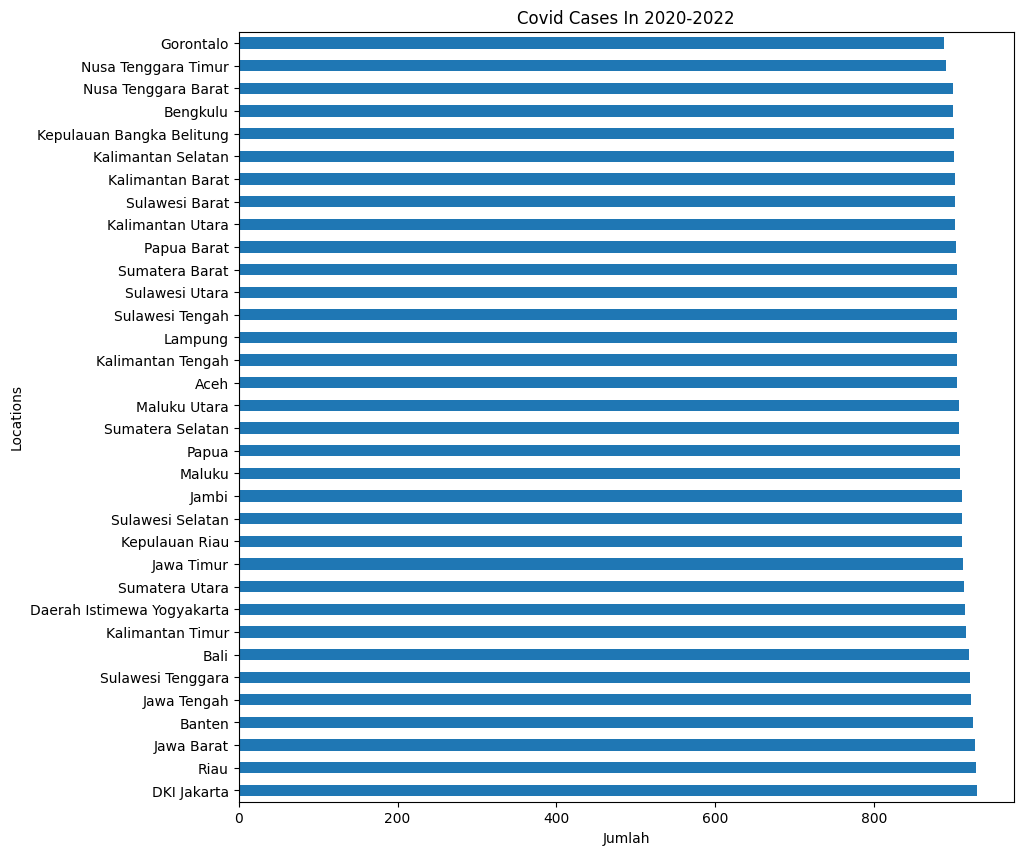

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
df_filtered['Location'].value_counts().plot.barh('bar')
plt.xlabel('Jumlah')
plt.ylabel('Locations')
plt.title('Covid Cases In 2020-2022')
plt.show()

In [8]:
from dateutil import parser

df_filtered['Date'] = df_filtered['Date'].map(parser.parse)


C:\Users\bahfi\AppData\Local\Temp\ipykernel_13508\515254956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = df_filtered['Date'].map(parser.parse)


In [9]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')

C:\Users\bahfi\AppData\Local\Temp\ipykernel_13508\3499188711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')


In [10]:
df_filtered['Year'] = df_filtered['Date'].dt.year

C:\Users\bahfi\AppData\Local\Temp\ipykernel_13508\2134627504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Date'].dt.year


In [11]:
df_filtered = df_filtered.dropna(subset=['Date'])

In [12]:
data_per_tahun = df_filtered.groupby(df_filtered["Date"].dt.year)[
    ["New Cases", "New Deaths", "New Recovered"]
].sum().reset_index()

print("Jumlah per tahun:")
print(data_per_tahun)

Jumlah per tahun:
   Date  New Cases  New Deaths  New Recovered
0  2020     750848       22993         623760
1  2021    3511801      121143        3490312
2  2022    2134660       13683        2090481


In [13]:
df_filtered['Month'] = df_filtered['Date'].dt.month

In [14]:
data_perbulan = df_filtered.groupby(['Year', 'Month']).agg({
    'New Cases': 'sum',
    'New Deaths': 'sum',
    'New Recovered': 'sum'
}).reset_index()

data_perbulan

,Year,Month,New Cases,New Deaths,New Recovered
0,2020,3,1020,186,191
1,2020,4,8658,689,1999
2,2020,5,17191,886,6855
3,2020,6,30737,1561,19189
4,2020,7,53603,2349,38286
5,2020,8,66959,2458,59682
6,2020,9,112764,3201,88269
7,2020,10,124214,3344,130507
8,2020,11,129722,3345,115139
9,2020,12,205980,4974,163643


In [15]:
def rank_by_year(df_filtered, value_column):
    df_filtered['Rank'] = df_filtered.groupby('Year')[value_column].rank(ascending=False, method='first').astype(int)
    return df_filtered

rank_cases = data_perbulan.copy()
rank_cases = rank_by_year(rank_cases, 'New Cases')

rank_deaths = data_perbulan.copy()
rank_deaths = rank_by_year(rank_deaths, 'New Deaths')

rank_recovered = data_perbulan.copy()
rank_recovered = rank_by_year(rank_recovered, 'New Recovered')


rank_cases.sort_values(['Year', 'Rank']), rank_deaths.sort_values(['Year', 'Rank']), rank_recovered.sort_values(['Year', 'Rank'])

(    Year  Month  New Cases  New Deaths  New Recovered  Rank
 9   2020     12     205980        4974         163643     1
 8   2020     11     129722        3345         115139     2
 7   2020     10     124214        3344         130507     3
 6   2020      9     112764        3201          88269     4
 5   2020      8      66959        2458          59682     5
 4   2020      7      53603        2349          38286     6
 3   2020      6      30737        1561          19189     7
 2   2020      5      17191         886           6855     8
 1   2020      4       8658         689           1999     9
 0   2020      3       1020         186            191    10
 16  2021      7    1225732       35549         896480     1
 17  2021      8     680958       38570         978471     2
 15  2021      6     359024        8294         215380     3
 10  2021      1     331092        7428         256689     4
 11  2021      2     256141        6215         270684     5
 12  2021      3     175

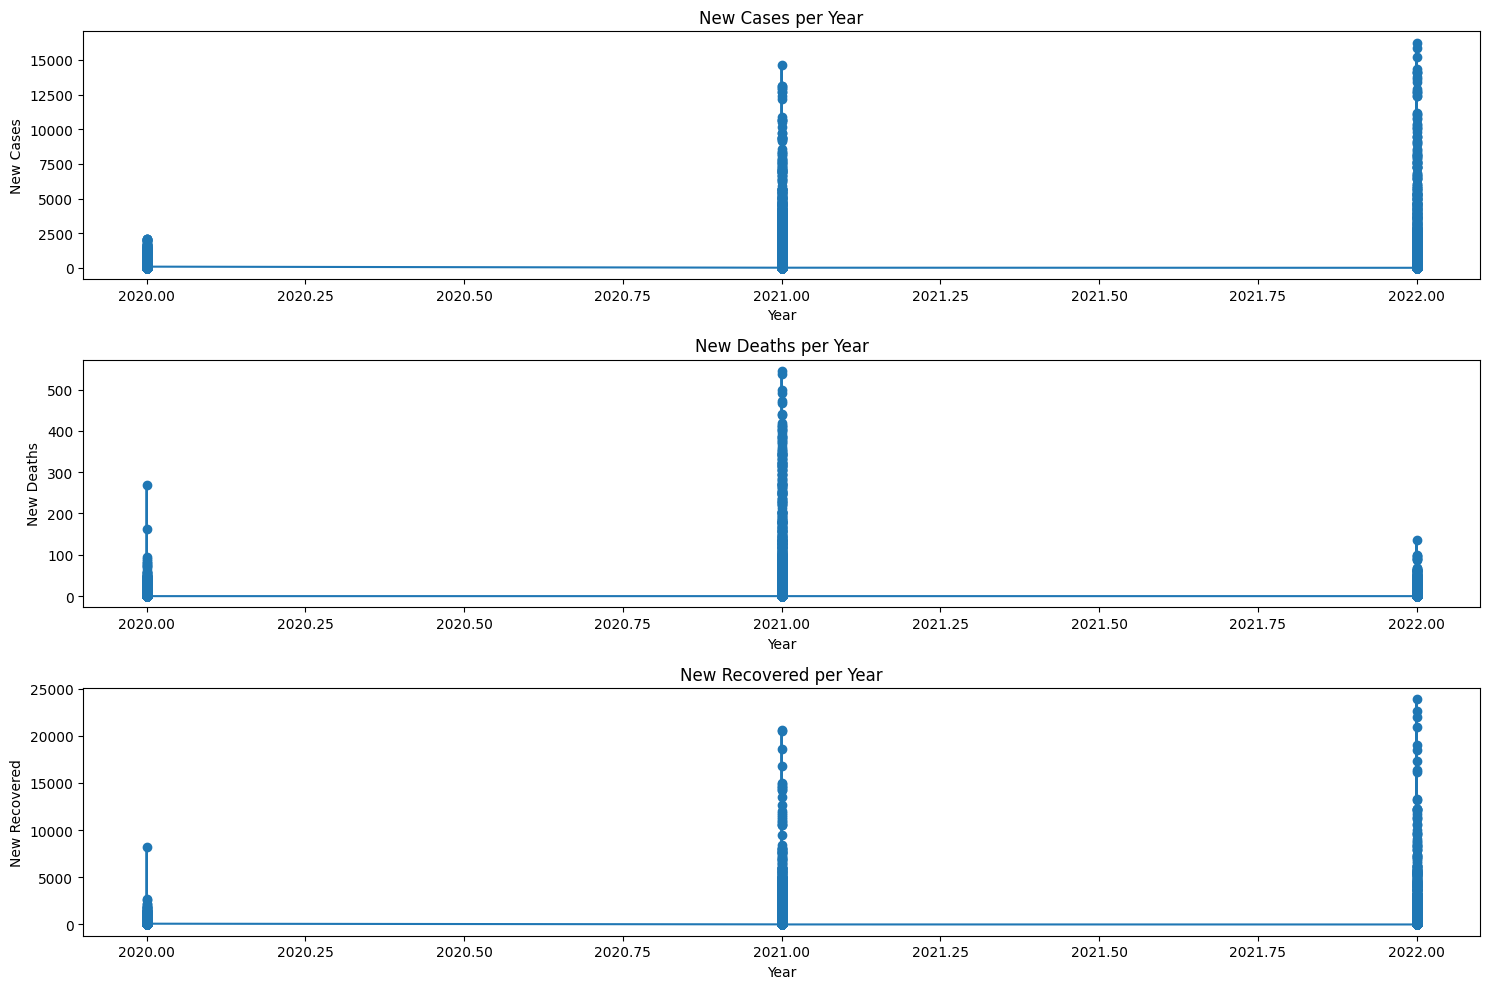

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df_filtered['Year'], df_filtered['New Cases'], marker='o', linestyle='-')
plt.title('New Cases per Year')
plt.xlabel('Year')
plt.ylabel('New Cases')

plt.subplot(3, 1, 2)
plt.plot(df_filtered['Year'], df_filtered['New Deaths'], marker='o', linestyle='-')
plt.title('New Deaths per Year')
plt.xlabel('Year')
plt.ylabel('New Deaths')

plt.subplot(3, 1, 3)
plt.plot(df_filtered['Year'], df_filtered['New Recovered'], marker='o', linestyle='-')
plt.title('New Recovered per Year')
plt.xlabel('Year')
plt.ylabel('New Recovered')

plt.tight_layout()
plt.show()

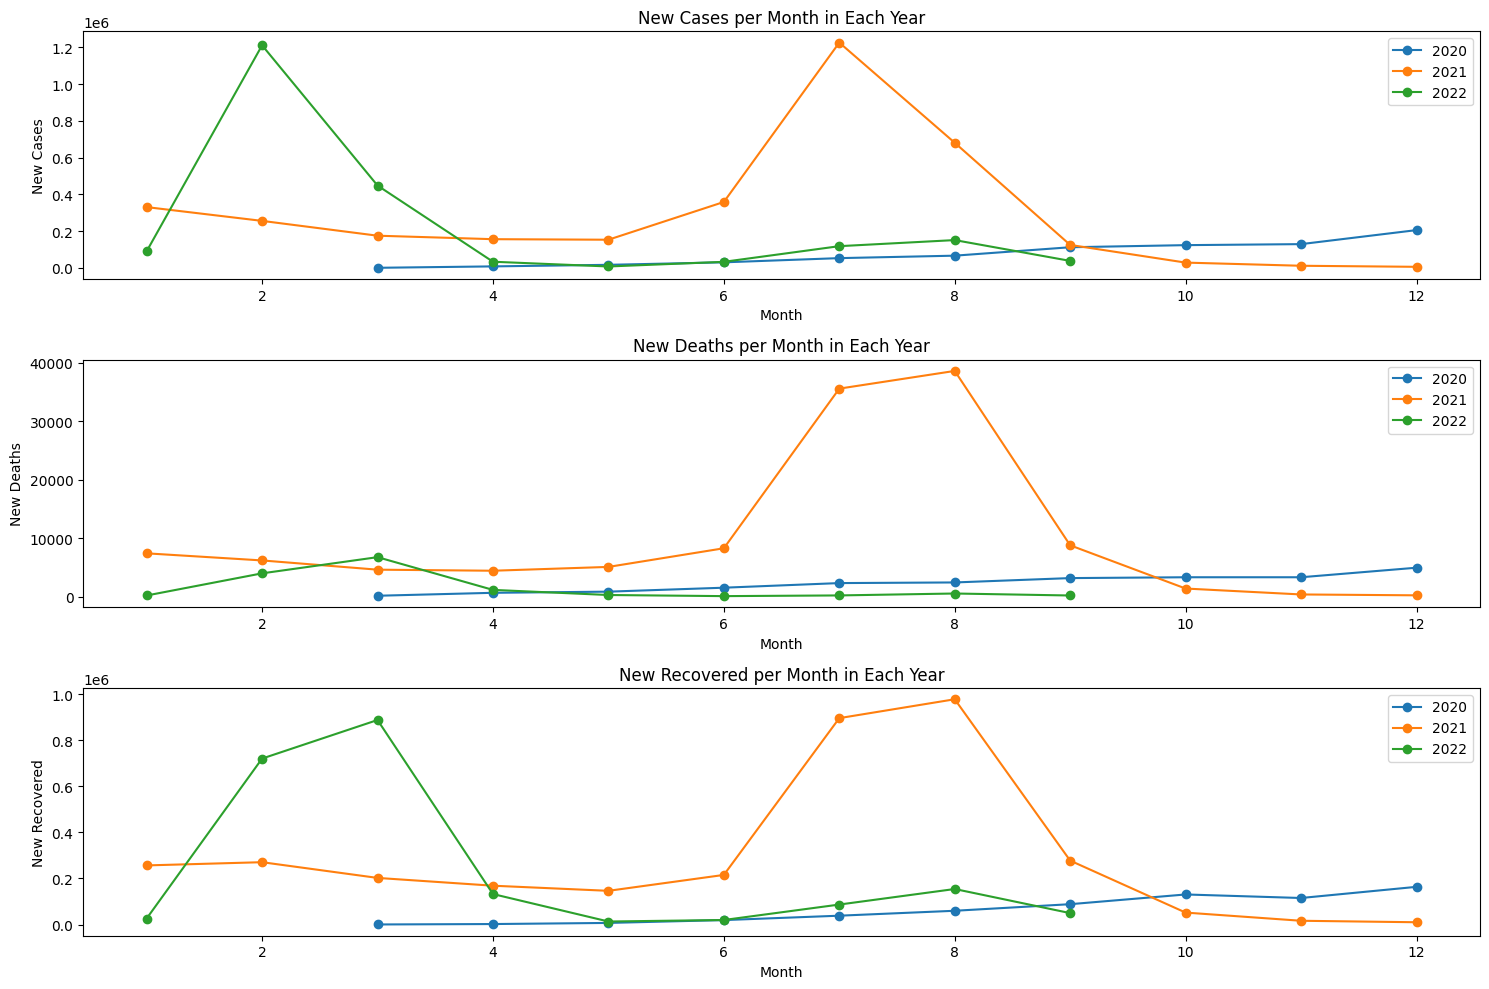

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
for year in data_perbulan['Year'].unique():
    df_filtered = data_perbulan[data_perbulan['Year'] == year]
    plt.plot(df_filtered['Month'], df_filtered['New Cases'], marker='o', linestyle='-', label=str(year))
plt.title('New Cases per Month in Each Year')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend()

plt.subplot(3, 1, 2)
for year in data_perbulan['Year'].unique():
    df_filtered = data_perbulan[data_perbulan['Year'] == year]
    plt.plot(df_filtered['Month'], df_filtered['New Deaths'], marker='o', linestyle='-', label=str(year))
plt.title('New Deaths per Month in Each Year')
plt.xlabel('Month')
plt.ylabel('New Deaths')
plt.legend()

plt.subplot(3, 1, 3)
for year in data_perbulan['Year'].unique():
    df_filtered = data_perbulan[data_perbulan['Year'] == year]
    plt.plot(df_filtered['Month'], df_filtered['New Recovered'], marker='o', linestyle='-', label=str(year))
plt.title('New Recovered per Month in Each Year')
plt.xlabel('Month')
plt.ylabel('New Recovered')
plt.legend()

plt.tight_layout()
plt.show()